## Задание 2

In [15]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_files
import pydotplus
from IPython.display import Image
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

Загрузим датасет **German Credit Data** и извлечем значения из файла.

*Разобраться с признаками в german.numeric-data не представилось возможным (потому что нет описаний признаков), поэтому я преобразовала категореальные признаки из german.data.*

In [3]:
with open('german.data', 'r') as file:
    filedata = file.read()

filedata = filedata.replace('A', '')

with open('german-numeric-true.data', 'w') as file:
    file.write(filedata)

In [4]:
data = pd.read_csv("german-numeric-true.data", sep=' ')
data = np.array(data)

**Построим таблицу**, сопоставив каждому признаку его название.

In [5]:
data_table = pd.DataFrame(data[:, :-1])
data_headers = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 
                'Credit amount', 'Savings account/bonds', 'Present employment since', 
                'Installment rate in percentage of disposable income', 'Personal status and sex', 
                'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years', 
                'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job', 
                'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker']
#data_headers = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Credit amount', 
#                'Savings account/bonds', 'Present employment since', 'Personal status and sex', 
#                'Present residence since', 'Property', 'Age in years', 'Other installment plans', 
#                'Number of existing credits at this bank', 
#                'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 
#                '?', '?', 'Other debtors / guarantors', '?', '?', 'Housing', '?', ] ост на 3 с конца
data_table.columns = data_headers
data_table.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,12,48,32,43,5951,61,73,2,92,101,2,121,22,143,152,1,173,1,191,201
1,14,12,34,46,2096,61,74,2,93,101,3,121,49,143,152,1,172,2,191,201
2,11,42,32,42,7882,61,74,2,93,103,4,122,45,143,153,1,173,2,191,201
3,11,24,33,40,4870,61,73,3,93,101,4,124,53,143,153,2,173,2,191,201
4,14,36,32,46,9055,65,73,2,93,101,4,124,35,143,153,1,172,2,192,201


Теперь **визуализируем решающее дерево**.

In [6]:
model = tree.DecisionTreeClassifier(max_depth=4)

data_small = data
model.fit(data_small[:, :-1], data_small[:, -1:])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [191]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                                feature_names=data_headers,
                                filled=True, rounded=True, 
                                special_characters=True)

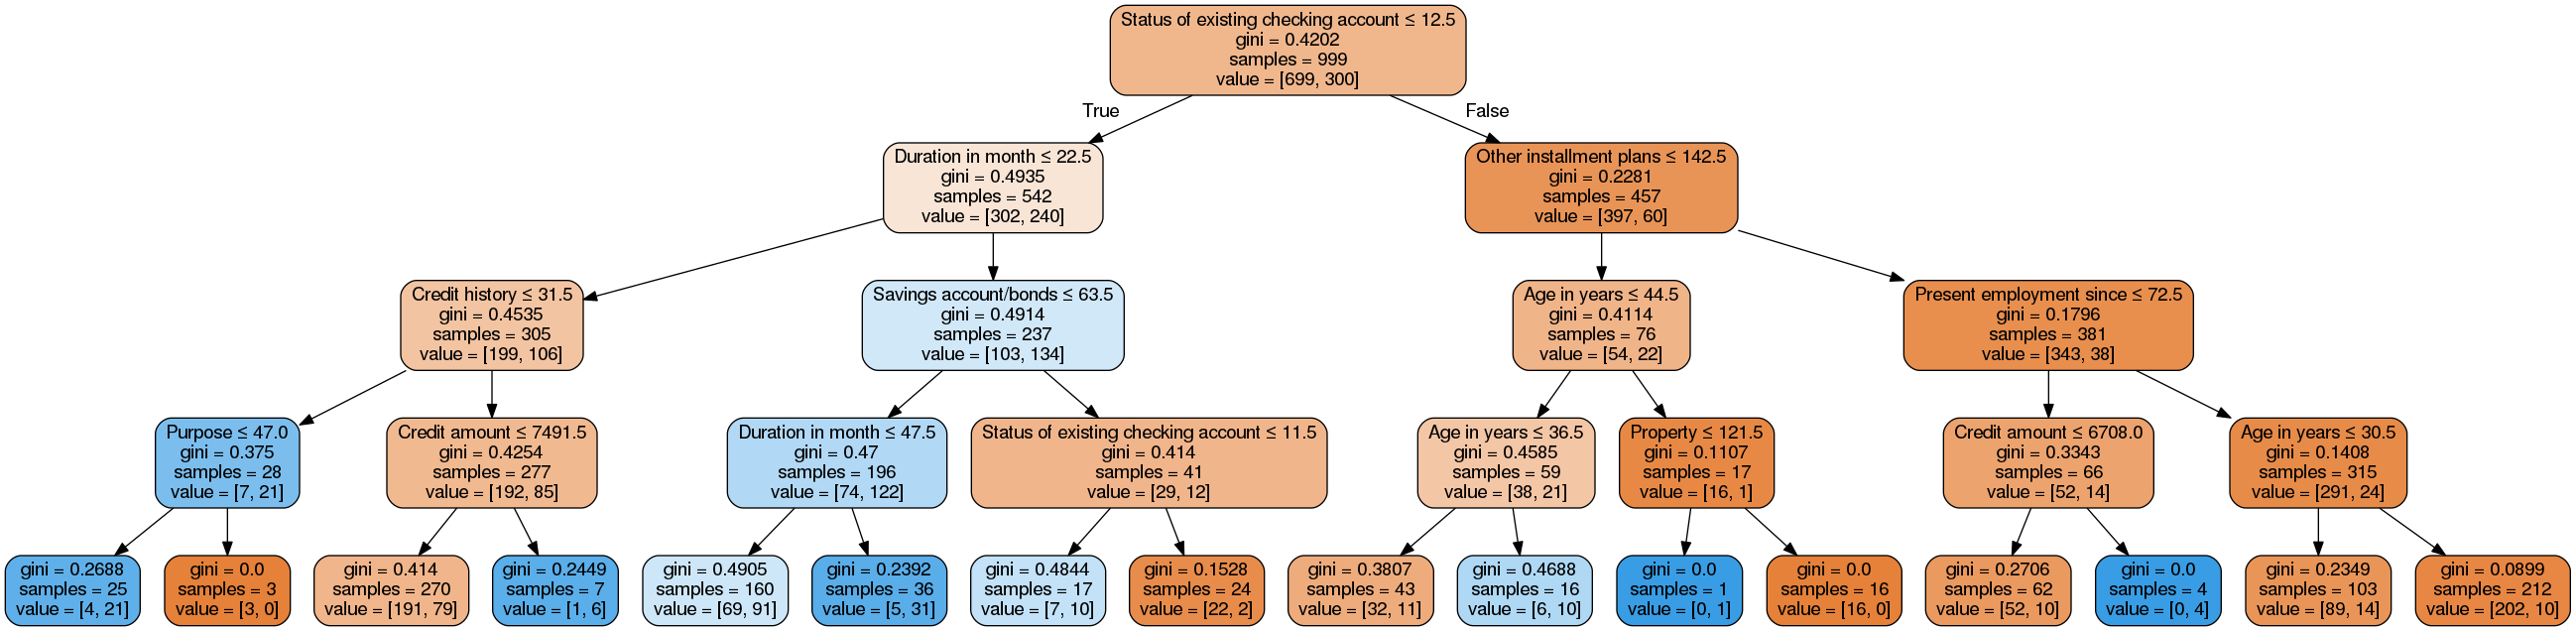

In [192]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

# синее -- отказываем, коричневое -- принимаем

Проинтерпретировать это можно так. В целом, кредит скорее дадут, потому что, как написано в описании данных: "It is worse to class a customer as good when they are bad, than it is to class a customer as bad when they are good."

Если у человека хорошо с деньгами, ему не нужно ничего больше выплачивать, он работает больше 1 года, то однозначно даем ему кредит (а вот если недолго -- придется брать кредит на небольшую сумму).

Если же ему нужно что-то выплачивать и он старый, то тут придется посмотреть на его имущество: если его мало, то не даем кредит. Молодым в таком случае охотнее дают кредит.

Пройдемся по другой ветке. Если у человека плохо с деньгами и он берет кредит на большой срок -- скорее не дадут, но если же у него открыты вклады на большие суммы, то всё нормально.

Если все же срок маленький, кредитов не брал, и цель не приносящая дохода (не бизнес и не переквалификация), то не дадут. Если уже брал кредиты и хочет взять чуть-чуть, то пожалуйста.

Построим **полное решающее дерево**.

In [7]:
model.fit(data[:, :-1], data[:, -1:])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
dot_data = tree.export_graphviz(model, out_file="full_tree.out", 
                                feature_names=data_headers,
                                filled=True, rounded=True, 
                                special_characters=True)

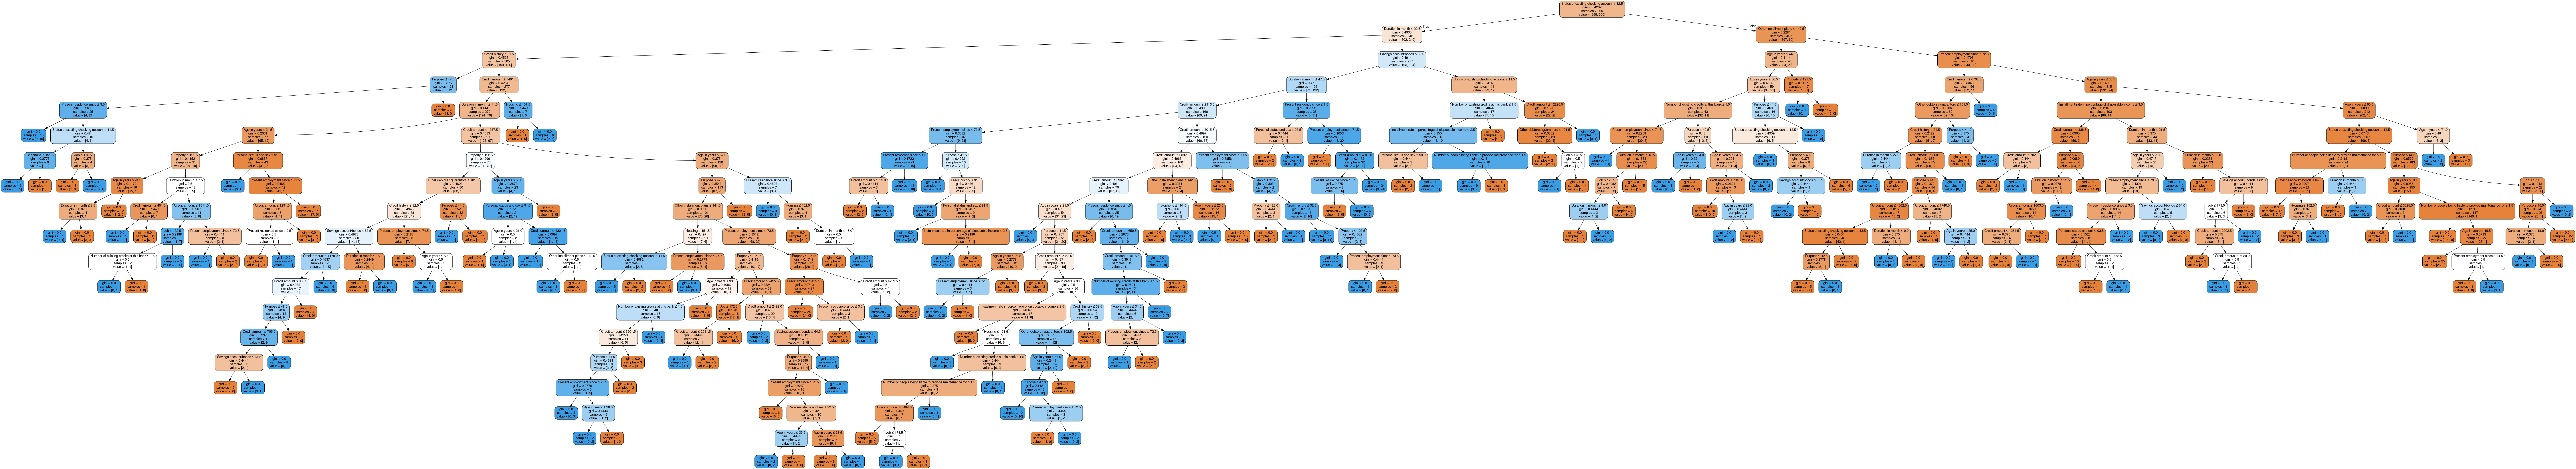

In [133]:
graph = pydotplus.graphviz.graph_from_dot_file("full_tree.out")  
Image(graph.create_png())

Наконец, построим **график зависимости качества** на кросс-валидации.

In [16]:
accuracy_values = []
cross_val_scores = []
depth_values = range(1, 30)

for depth in depth_values:
    cross_val_scores.append(np.mean(cross_val_score(
                tree.DecisionTreeClassifier(max_depth=depth), 
                data[:, :-1], data[:, -1], cv=5)))
    
    train_data, test_data, train_target, test_target = train_test_split(data[:, :-1], data[:, -1:], test_size=0.2)
    test_predictions = model.predict(test_data)
    accuracy_values.append(accuracy_score(test_target, test_predictions))

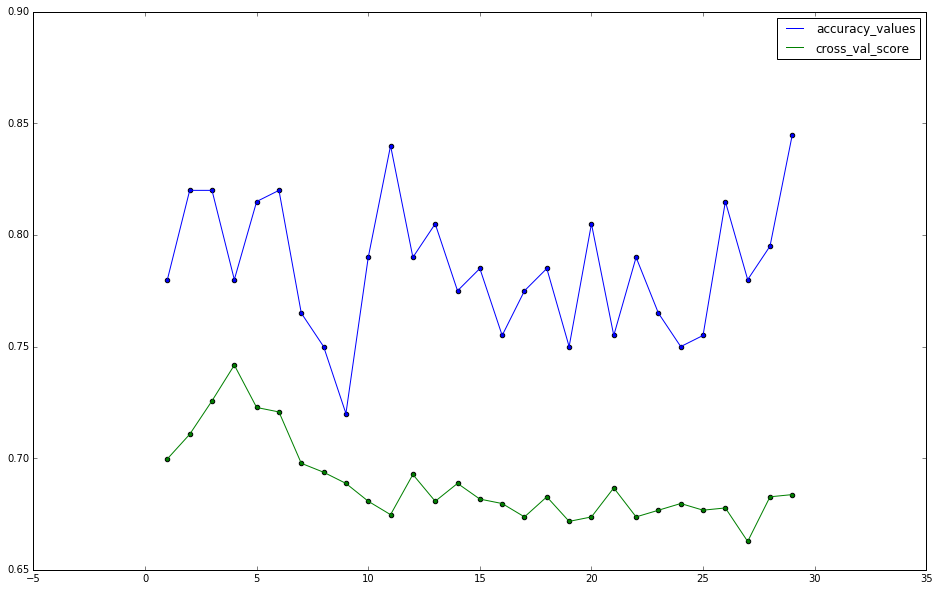

In [23]:
plt.figure(figsize=(16, 10))
plt.plot(depth_values, accuracy_values, c='b', label='accuracy_values')
plt.scatter(depth_values, accuracy_values, c='b')
plt.plot(depth_values, cross_val_scores, c='g', label='cross_val_score')
plt.scatter(depth_values, cross_val_scores, c='g')
plt.legend()
plt.show()